<a href="https://colab.research.google.com/github/GauravL98/MAE598_DO/blob/homework3/hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Homework 3

problem 1

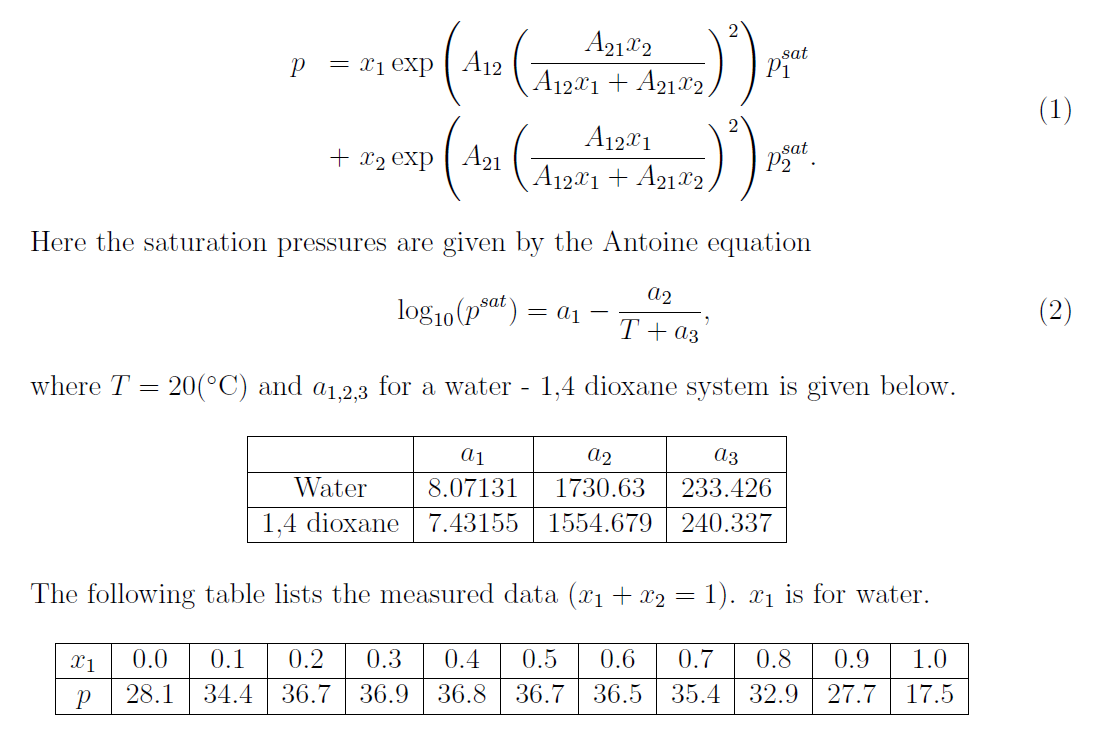

1) Formulate the least square problem


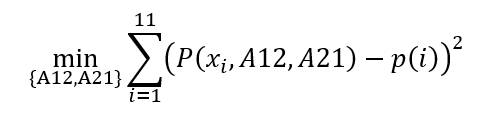

(2) Since the model is nonlinear, the problem does not have an analytical solution. Therefore, solve it using the gradient descent

In [66]:
import numpy as np
import torch as t
from torch.autograd import Variable
import math
import matplotlib.pyplot as plt

x1 = np.array([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
x2 = 1-x1;
p = np.array([28.1,34.4,36.7,36.9,36.8,36.7,36.5,35.4,32.9,27.7,17.5])
T = 20

pswater = 10**(8.07131 - (1730.63/(20+233.426)))
psdio =   10**(7.43155 - (1554.679/(20+240.337)))
#print(pswater,psdio)

x =   Variable(t.tensor([1.0,1.0]),requires_grad=True)

#step size
a = 0.0001

for i in range(600):
  for i in range(0,len(x1)):

    loss = (((x1[i]*t.exp(x[0]*((x[1]*x2[i]/(x[0]*x1[i] + x[1]*x2[i]))**2))*pswater +
    x2[i]*t.exp(x[1]*((x[0]*x1[i]/(x[0]*x1[i] + x[1]*x2[i]))**2))*psdio)) - p[i])**2

    loss.backward()
  x.grad.numpy()
  with t.no_grad():
    x -= a*x.grad
    x.grad.zero_()

print('vales of a12 and a21',x.data.numpy(),'\n')
print('minimum value of the function',loss.data.numpy(),'\n')

vales of a12 and a21 [1.9581703 1.6893898] 

minimum value of the function 0.00071549066 



(3) Compare your optimized model with the data.

P from table  28.1 P_computed =  28.824099527405245 Error  -0.7240995274052437
P from table  34.4 P_computed =  34.64325152434382 Error  -0.24325152434381891
P from table  36.7 P_computed =  36.452196298158825 Error  0.24780370184117828
P from table  36.9 P_computed =  36.866775778549346 Error  0.03322422145065218
P from table  36.8 P_computed =  36.87351710771701 Error  -0.07351710771700937
P from table  36.7 P_computed =  36.749372382418656 Error  -0.04937238241865316
P from table  36.5 P_computed =  36.390181867991224 Error  0.1098181320087761
P from table  35.4 P_computed =  35.3850466893099 Error  0.014953310690096089
P from table  32.9 P_computed =  32.948716743426345 Error  -0.04871674342634691
P from table  27.7 P_computed =  27.731356050957757 Error  -0.03135605095775773
P from table  17.5 P_computed =  17.47325208459706 Error  0.026747915402939526


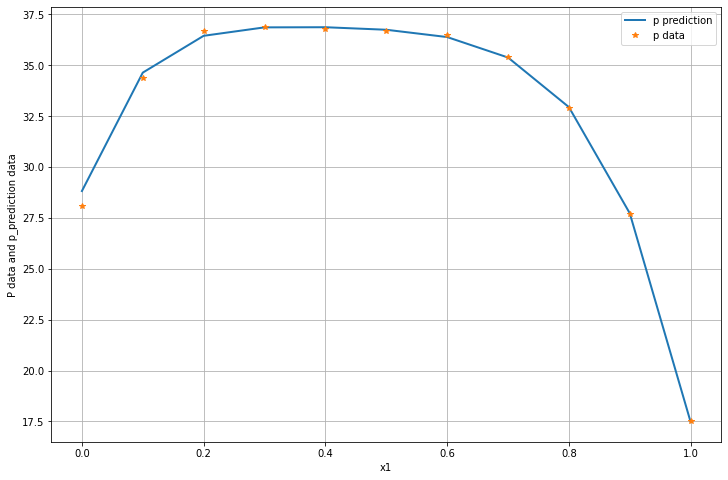

In [75]:
p_error = []
for i in range(0, len(x1)):
   p_comp = ((x1[i]*math.exp(x[0]*((x[1]*x2[i]/(x[0]*x1[i] + x[1]*x2[i]))**2))*pswater +
    x2[i]*math.exp(x[1]*((x[0]*x1[i]/(x[0]*x1[i] + x[1]*x2[i]))**2))*psdio))
   error = p[i] - p_comp 
   print("P from table ", p[i], "P_computed = ", p_comp, "Error ", error)
   p_error.append(p_comp)


plt.figure(figsize=(12,8))
plt.plot(x1,p_error,linewidth=2)
plt.plot(x1,p,'*')
plt.grid()
plt.xlabel('x1')
plt.ylabel('P data and p_prediction data')
plt.legend(('p prediction','p data'),loc='best')
plt.show()